# WHERE clause

**SYNTAX**:
```postgresql
SELECT column_list
FROM table_name
WHERE condition
ORDER BY sort_expression;
```

PostgreSQL evaluates the `WHERE` clause after the `FROM` clause but before the `SELECT` and `ORDER BY` clauses.

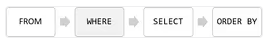

If you use **column aliases** in the `SELECT` clause, you cannot use them in the` WHERE` clause.

# AND operator

In PostgreSQL, a boolean value can have one of three values: `true`, `false`, or `null`.

PostgreSQL uses:
* `true, 't', 'true', 'y', 'yes', '1'` to represent `true`.
* `false, 'f', 'false', 'n', 'no', and '0'` to represent `false`.

A boolean expression is an expression that evaluates to a boolean value.

```postgresql
SELECT 1 = 1 AS result;  -- result = t
SELECT 1 <> 1 AS result; -- result = f
```

**SYNTAX**: `expression1 AND expression2`
* The `AND` operator returns `true` only if both expressions are `true`.
* It returns `false` if one of the expressions is `false`.
* Otherwise, it returns `null`.

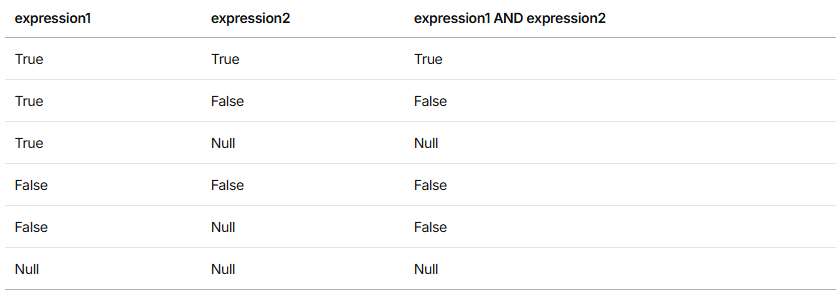

**Using the `AND` operator in the `WHERE` clause**
```postgresql
SELECT
  title,
  length,
  rental_rate
FROM
  film
WHERE
  length > 180
  AND rental_rate < 1; 
```

# OR operator

**SYNTAX**: `expression1 OR expression2`
* The `OR` operator returns `true` only if any of the expressions is `true`.
* It returns `false` if both expressions are false.
* Otherwise, it returns `null`.

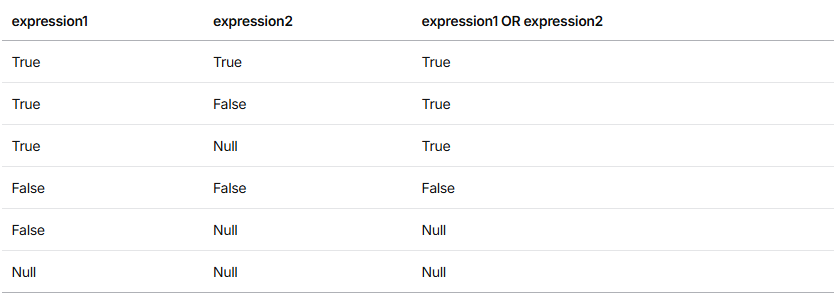

**Using the `OR` operator in the `WHERE` clause**

```postgresql
SELECT
  title,
  rental_rate
FROM
  film
WHERE
  rental_rate = 0.99 OR
  rental_rate = 2.99; 
``` 

# LIMIT clause (Not a ANSI SQL standard)

**SYNTAX**
```postgresql
SELECT column_list
FROM table_name
ORDER BY sort_expression
LIMIT row_count
OFFSET row_to_skip;
```

PostgreSQL `LIMIT` is an **optional** clause of the `SELECT` statement that **constrains the number of rows returned by the query**.
* If the **row_count** is **zero**, the query returns an empty set.
* If the **row_count** is `NULL`, the query returns the same result set as it does not have the `LIMIT` clause.
* If you want to skip a number of rows before returning the **row_count** rows, you can use the `OFFSET` clause placed after the `LIMIT` clause.

> It’s important to note that PostgreSQL evaluates the `OFFSET` clause before the `LIMIT` clause.
> 
> ***`FROM >> WHERE >> SELECT >> ORDER BY >> OFFSET >> LIMIT`***

* PostgreSQL stores rows in a table in an unspecified order; therefore, when you use the `LIMIT` clause, you should always use the `ORDER BY` clause to control the row order.
* If you don’t use the `ORDER BY` clause, you may get a result set with the rows in an unspecified order.

**Using the `LIMIT` clause with the `OFFSET` clause**
```postgresql
SELECT film_id, title, release_year
FROM film
ORDER BY film_id
LIMIT 4 
OFFSET 3; 
```

# FETCH clause (ANSI SQL version of LIMIT)

* The `LIMIT` clause is not a SQL standard.
* To conform with the SQL standard, PostgreSQL supports the `FETCH` clause to skip a certain number of rows and then fetch a specific number of rows.
* The `FETCH` clause is functionally equivalent to the `LIMIT` clause. If you plan to make your application compatible with other database systems, you should use the `FETCH` clause because it follows the standard SQL.

**SYNTAX**
```postgresql
OFFSET row_to_skip { ROW | ROWS }
FETCH { FIRST | NEXT } [ row_count ] { ROW | ROWS } ONLY
```
* The **row_to_skip** defaults to 0.
* The **row_count** defaults to 1.

**EXAMPLES**

```postgresql

SELECT film_id, title
FROM film
ORDER BY title
FETCH FIRST ROW ONLY;
-- FETCH FIRST 1 ROW ONLY;
-- FETCH FIRST 5 ROW ONLY;

SELECT film_id, title
FROM film
ORDER BY title
OFFSET 5 ROWS
FETCH FIRST 5 ROWS ONLY; 
```

# IN operator

**SYNTAX**
```postgresql
value IN (value1,value2,...); 
value NOT IN (value1,value2,...); 
```

* The `IN` operator allows you to check whether a value matches any value in a list of values.
* The `IN` operator returns `true` if the value is equal to any value in the list, such as value1 or value2, etc.
* The list of values can be a list of literal values, including numbers and strings.

**EXAMPLES**
```postgresql
WHERE film_id in (1, 2, 3);
WHERE film_id NOT IN (1, 2, 3); 

WHERE last_name IN ('Allen', 'Chase', 'Davis'); 

WHERE payment_date::date IN ('2007-02-15', '2007-02-16');
```

* To match the values in the `payment_date` column with a list of dates, you need to cast them to date values that have the date part only.
* To do that you use the **`::`** cast operator: `payment_date::date`
* For example, if the timestamp value is `2007-02-15 22:25:46.996577`, the **cast operator** will convert it to `2007-02-15`.

# BETWEEN operator

**SYNTAX**
```postgresql
value BETWEEN low AND high;
value NOT BETWEEN low AND high; 
```

* The `BETWEEN` operator allows you to check if a value falls within a range of values.
* If the value is greater than or equal to the low value and less than or equal to the high value, the `BETWEEN` operator returns `true`; otherwise, it returns `false`.

You can rewrite the `BETWEEN` operator by using the greater than or equal (`>=`) and less than or equal to (`<=`) operators and the logical `AND` operator:
```postgresql
value >= low AND value <= high; -- equivalent to BETWEEN oeprator
value < low OR value > high;    -- equivalent to NOT BETWEEN oeprator
```

**EXAMPLE**:
```postgresql
WHERE payment_id BETWEEN 17503 AND 17505; 

WHERE payment_id NOT BETWEEN 17503 AND 17505;

WHERE payment_date BETWEEN '2007-02-15' AND '2007-02-20';
```

# LIKE operator

**SYNTAX**:
```postgresql
value LIKE pattern

value NOT LIKE pattern
```

* The `LIKE` operator returns `true` if the value matches the pattern.
* The `NOT LIKE` operator returns `true` when the value does not match the pattern.
* You construct a pattern by combining literal values with wildcard characters and using the `LIKE` or `NOT LIKE` operator to find the matches.

PostgreSQL offers two wildcards for pattern matching:
* Percent sign (`%`) matches any sequence of zero or more characters.
* Underscore sign (`_`)  matches any single character.

> If the pattern does not contain any wildcard character, the `LIKE` operator behaves like the equal (`=`) operator.
> PostgreSQL `ILIKE` operator, which is similar to the `LIKE` operator, but allows for **case-insensitive matching**.

**EXAMPLE**:
```postgresql
SELECT 'Apple' LIKE 'Apple' AS result;  -- result = t
SELECT 'Apple' LIKE 'A%' AS result;     -- result = t

WHERE first_name LIKE '%er%';
WHERE first_name LIKE '_her%';

WHERE first_name NOT LIKE 'Jen%'; 

WHERE first_name ILIKE 'BAR%'; 
--  The BAR% pattern matches any string that begins with BAR, Bar, BaR, and so on.
```

**`LIKE` operator with `ESCAPE` option**
* Sometimes, the data that you want to match contains the wildcard characters `%` and `_`. 
* To instruct the `LIKE` operator to treat the wildcard characters `%` and `_` as regular literal characters, you can use the `ESCAPE` option in the `LIKE` operator.

**SYNTAX**:
```postgresql
string LIKE pattern ESCAPE escape_character;
```

**EXAMPLE**:

Consider below strings:
```
The rents are now 10% higher than last month
The new film will have _ in the title
```

```postgresql
SELECT * FROM table
WHERE message LIKE '%10$%%' ESCAPE '$';
```

In the pattern `%10$%%`, the first and last % are the wildcard characters, whereas the `%` that appears after the escape character `$` is a regular character.

# Introduction to NULL

* In the database world, `NULL` means missing information or not applicable.
* `NULL` is not a value; therefore, you cannot compare it with other values like numbers or strings.
* The comparison of `NULL` with a value will always result in `NULL`.
* Additionally, `NULL` is not equal to `NULL`, so the following expression returns `NULL`.

```postgresql
SELECT null = null AS result;  -- result = null
```

# IS NULL operator

**SYNTAX**: 
```postgresql
value IS NULL
value IS NOT NULL
```

* To check if a value is `NULL` or not, you cannot use the equal to (`=`) or not equal to (`<>`) operators. 
* Instead, you use the `IS NULL` operator.
* The `IS NULL` operator returns `true` if the value is `NULL` or `false` otherwise.
* The `IS NOT NULL` operator returns `true` if the value is `not NULL` or `false` otherwise.

> PostgreSQL offers some useful functions to handle `NULL` effectively, such as `NULLIF`, `ISNULL`, and `COALESCE`.

> To ensure that a column does not contain `NULL`, you use the `NOT NULL` constraint.